In [1]:
using JLD2, CairoMakie, FreqTables
using Jchemo, JchemoData
using CodecZlib # required since the dataset is compressed

In [2]:
path_jdat = dirname(dirname(pathof(JchemoData)))
db = joinpath(path_jdat, "data/mnist_20pcts.jld2")
@load db dat
pnames(dat)

(:Xtrain, :ytrain, :Xtest, :ytest)

In [3]:
Xtrain = dat.Xtrain
ytrain = dat.ytrain
Xtest = dat.Xtest
ytest = dat.ytest
Xtrain = Matrix(Xtrain) / 255
Xtest = Matrix(Xtest) / 255
ntrain, p = size(Xtrain)
ntest = nro(Xtest)
ntot = ntrain + ntest
(ntot = ntot, ntrain, ntest)

(ntot = 14000, ntrain = 12000, ntest = 2000)

In [4]:
summ(vec(Xtrain)).res

Row,variable,mean,std,min,max,n,nmissing
,Symbol,Float64,Float64,Float64,Float64,Int64,Int64
1,x1,0.131,0.308,0.0,1.0,9408000,0


In [5]:
summ(vec(Xtest)).res

Row,variable,mean,std,min,max,n,nmissing
,Symbol,Float64,Float64,Float64,Float64,Int64,Int64
1,x1,0.133,0.311,0.0,1.0,1568000,0


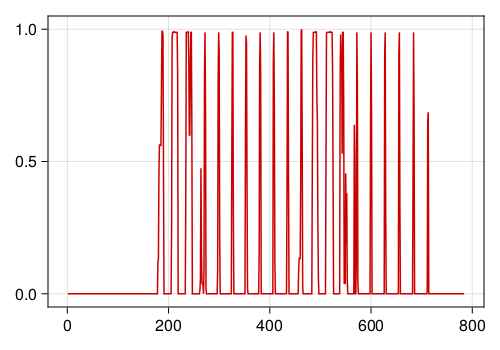

In [6]:
plotsp(Xtest; nsamp = 1).f

In [7]:
nlv = 25
fm = plsqda(Xtrain, ytrain; nlv = nlv) ;
pred = Jchemo.predict(fm, Xtest).pred
err(pred, ytest)

1×1 Matrix{Float64}:
 0.051

In [8]:
freqtable(ytest, vec(pred))

10×10 Named Matrix{Int64}
Dim1 ╲ Dim2 │   0    1    2    3    4    5    6    7    8    9
────────────┼─────────────────────────────────────────────────
0           │ 195    0    0    0    0    0    0    0    1    0
1           │   0  219    3    2    0    0    0    0    3    0
2           │   1    0  197    1    1    0    2    0    4    1
3           │   2    0    2  185    0    3    0    0    8    1
4           │   1    0    1    0  191    0    0    2    0    2
5           │   1    0    0    5    0  167    1    1    2    1
6           │   0    0    1    0    0    3  185    0    3    0
7           │   1    1   11    0    1    1    0  186    2    2
8           │   0    0    1    4    0    2    0    0  185    3
9           │   2    0    0    3    2    1    0    2    4  188

In [9]:
cf = confusion(pred, ytest) ;
pnames(cf)

(:cnt, :pct, :A, :Apct, :accuracy, :lev)

In [10]:
cf.cnt

Row,y,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,0,195,0,0,0,0,0,0,0,1,0
2,1,0,219,3,2,0,0,0,0,3,0
3,2,1,0,197,1,1,0,2,0,4,1
4,3,2,0,2,185,0,3,0,0,8,1
5,4,1,0,1,0,191,0,0,2,0,2
6,5,1,0,0,5,0,167,1,1,2,1
7,6,0,0,1,0,0,3,185,0,3,0
8,7,1,1,11,0,1,1,0,186,2,2
9,8,0,0,1,4,0,2,0,0,185,3


In [11]:
cf.pct

Row,levels,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,99.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
2,1,0.0,96.5,1.3,0.9,0.0,0.0,0.0,0.0,1.3,0.0
3,2,0.5,0.0,95.2,0.5,0.5,0.0,1.0,0.0,1.9,0.5
4,3,1.0,0.0,1.0,92.0,0.0,1.5,0.0,0.0,4.0,0.5
5,4,0.5,0.0,0.5,0.0,97.0,0.0,0.0,1.0,0.0,1.0
6,5,0.6,0.0,0.0,2.8,0.0,93.8,0.6,0.6,1.1,0.6
7,6,0.0,0.0,0.5,0.0,0.0,1.6,96.4,0.0,1.6,0.0
8,7,0.5,0.5,5.4,0.0,0.5,0.5,0.0,90.7,1.0,1.0
9,8,0.0,0.0,0.5,2.1,0.0,1.0,0.0,0.0,94.9,1.5


In [12]:
cf.accuracy

94.9

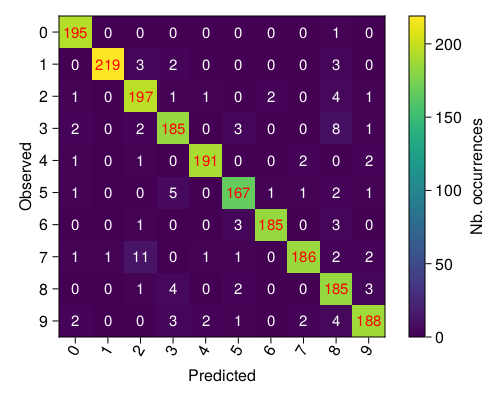

In [13]:
plotconf(cf).f

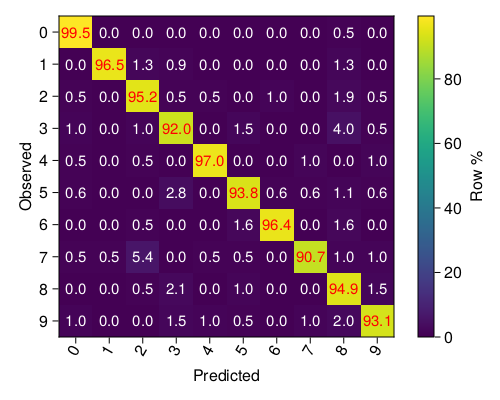

In [14]:
plotconf(cf; cnt = false).f

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*